# AURORA 

## Setup

In [7]:
!pip install brainles_aurora matplotlib

%load_ext autoreload
%autoreload 2

## Data

Aurora expects preprocessed input data as NIfTI file or NumPy Array.  
If your data is not preprocessed yet, consider using our [BrainLes preprocessing](https://github.com/BrainLesion/preprocessing) package (or its predecessor [BraTS-Toolkit](https://github.com/neuronflow/BraTS-Toolkit)).

In this example we provide sample data from the [ASNR-MICCAI BraTS Brain Metastasis Challenge](https://www.synapse.org/#!Synapse:syn51156910/wiki/622553), which is already preprocessed.

## Using Aurora

### Minimal example using default settings and only T1 as input

In [2]:
from brainles_aurora.inferer import AuroraGPUInferer, AuroraInferer, AuroraInfererConfig

config = AuroraInfererConfig()  # Use default config

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

_ = inferer.infer(
    t1="data/t1n.nii.gz",
    segmentation_file="output/segmentation.nii.gz",
)

2024-01-29 14:43:23 INFO: Initialized AuroraGPUInferer with config: AuroraInfererConfig(log_level=20, tta=False, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
2024-01-29 14:43:23 INFO: Using device: cuda
2024-01-29 14:43:23 INFO: Logging to: output/segmentation.log
2024-01-29 14:43:23 INFO: Successfully validated input images. Input mode: NIFTI_FILEPATH
2024-01-29 14:43:23 INFO: Received files: T1: True, T1C: False, T2: False, FLAIR: False
2024-01-29 14:43:23 INFO: Inference mode: t1-o
2024-01-29 14:43:23 INFO: No loaded compatible model found. Loading Model and weights
2024-01-29 14:43:24 INFO: Setting up Dataloader
2024-01-29 14:43:24 INFO: Running inference on device := cuda


BasicUNet features: (32, 32, 64, 128, 256, 32).


2024-01-29 14:43:30 INFO: Post-processing data
2024-01-29 14:43:31 INFO: Saving post-processed data as NIFTI files
2024-01-29 14:43:31 INFO: Saved segmentation to output/segmentation.nii.gz
2024-01-29 14:43:31 INFO: Returning post-processed data as Dict of Numpy arrays
2024-01-29 14:43:31 INFO: Finished inference 



Visualize results

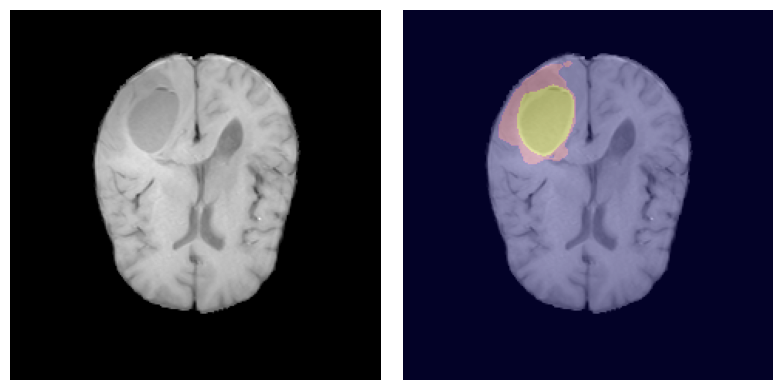

In [3]:
from utils import visualize_results
visualize_results(t1_file="data/t1n.nii.gz", segmentation_file="output/segmentation.nii.gz")

### Multiple input modalities and all available outputs

In [4]:
from brainles_aurora.inferer import AuroraGPUInferer, AuroraInferer, AuroraInfererConfig

config = AuroraInfererConfig()  # Use default config

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

# Use 4 input modalities, all outputs and a custom log file
_ = inferer.infer(
    t1="data/t1n.nii.gz",
    t1c="data/t1c.nii.gz",
    t2="data/t2w.nii.gz",
    fla="data/t2f.nii.gz",
    segmentation_file="output/segmentation.nii.gz",
    whole_tumor_unbinarized_floats_file="output/whole_tumor_unbinarized_floats.nii.gz",
    metastasis_unbinarized_floats_file="output/metastasis_unbinarized_floats.nii.gz",
    log_file="output/custom_logfile.log",
)

2024-01-29 14:43:31 INFO: Initialized AuroraGPUInferer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
2024-01-29 14:43:31 INFO: Using device: cuda
2024-01-29 14:43:31 INFO: Logging to: output/custom_logfile.log
2024-01-29 14:43:31 INFO: Successfully validated input images. Input mode: NIFTI_FILEPATH
2024-01-29 14:43:31 INFO: Received files: T1: True, T1C: True, T2: True, FLAIR: True
2024-01-29 14:43:31 INFO: Inference mode: t1-t1c-t2-fla
2024-01-29 14:43:31 INFO: No loaded compatible model found. Loading Model and weights
2024-01-29 14:43:31 INFO: Setting up Dataloader
2024-01-29 14:43:31 INFO: Running inference on device := cuda
2024-01-29 14:43:38 INFO: Applying test time augmentations
2024-01-29 14:45:07 INFO: Post-processing data
2024-01-29 14:45:07 INFO: Saving post-processed data as NIFTI files
2024-01-29 14:45:07 IN

BasicUNet features: (32, 32, 64, 128, 256, 32).


### NumPy Inputs

In [5]:
from brainles_aurora.inferer import (
    AuroraGPUInferer,
    AuroraInferer,
    AuroraInfererConfig,
    DataMode,
)
import nibabel as nib

config = AuroraInfererConfig()

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

# load data
t1_np = nib.load("data/t1n.nii.gz").get_fdata()
results = inferer.infer(t1=t1_np)
print(results.keys())

BasicUNet features: (32, 32, 64, 128, 256, 32).
dict_keys([<Output.SEGMENTATION: 'segmentation'>, <Output.WHOLE_NETWORK: 'whole_network'>, <Output.METASTASIS_NETWORK: 'metastasis_network'>])
